## संभाव्यता आणि सांख्यिकीची ओळख  
## असाइनमेंट  

या असाइनमेंटमध्ये, आपण मधुमेह रुग्णांचा डेटासेट वापरणार आहोत जो [येथून घेतलेला आहे](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).  


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../../../data/diabetes.tsv",sep='\t')
df.head()

AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

या डेटासेटमध्ये खालील प्रकारचे स्तंभ आहेत:
* वय आणि लिंग स्वतः स्पष्ट आहेत
* BMI म्हणजे शरीराचा वस्तुमान निर्देशांक
* BP म्हणजे सरासरी रक्तदाब
* S1 ते S6 हे वेगवेगळ्या रक्ताचे मोजमाप आहेत
* Y म्हणजे एका वर्षाच्या कालावधीत रोगाच्या प्रगतीचे गुणात्मक मोजमाप

चला संभाव्यता आणि सांख्यिकीच्या पद्धती वापरून या डेटासेटचा अभ्यास करूया.

### कार्य 1: सर्व मूल्यांसाठी सरासरी आणि विचलन गणना करा


In [5]:
df.describe()

AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005  
min     22.000000    2.000000    3.258100   58.000000   25.000000  
25%     40.250000    3.000000    4.276700   83.250000   87.000000  
50%     48.000000    4.000000    4.620050   91.000000  140.500000  
75%     57.750000    5.000000    4.997200   98.000000  211.500000  
max     99.000000    9.090000    6.107000  124.000000  346.000000

In [8]:
# Another way
pd.DataFrame([df.mean(),df.var()],index=['Mean','Variance']).head()

AGE       SEX        BMI          BP           S1          S2  \
Mean       48.51810  1.468326  26.375792   94.647014   189.140271  115.439140   
Variance  171.84661  0.249561  19.519798  191.304401  1197.717241  924.955494   

                  S3        S4        S5          S6            Y  
Mean       49.788462  4.070249  4.641411   91.260181   152.133484  
Variance  167.293585  1.665261  0.272892  132.165712  5943.331348

In [9]:
# Or, more simply, for the mean (variance can be done similarly)
df.mean()

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64

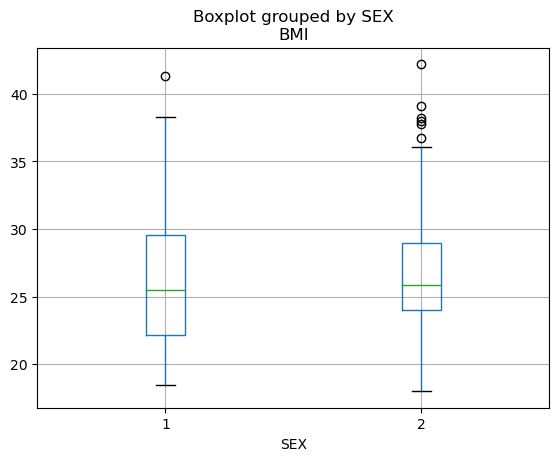

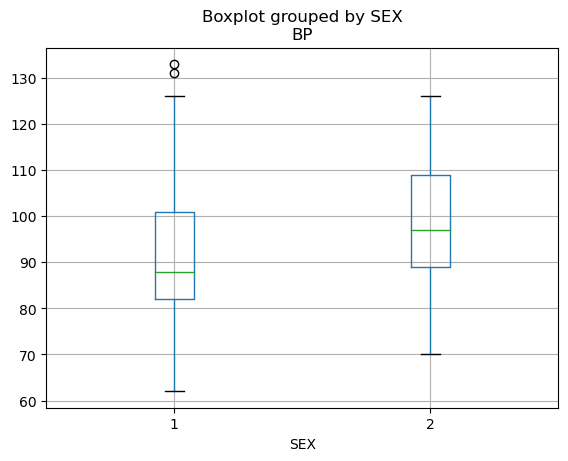

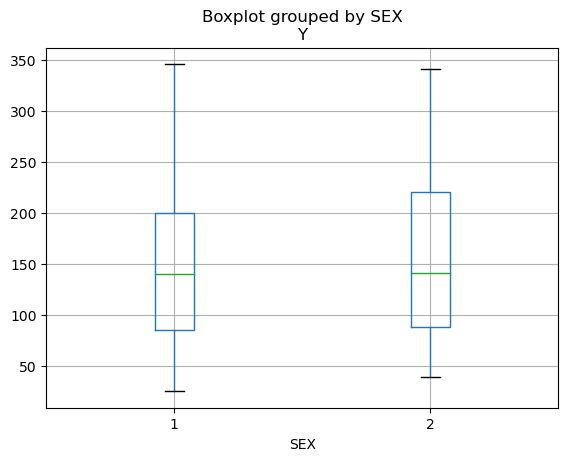

In [17]:
for col in ['BMI','BP','Y']:
    df.boxplot(column=col,by='SEX')
plt.show()

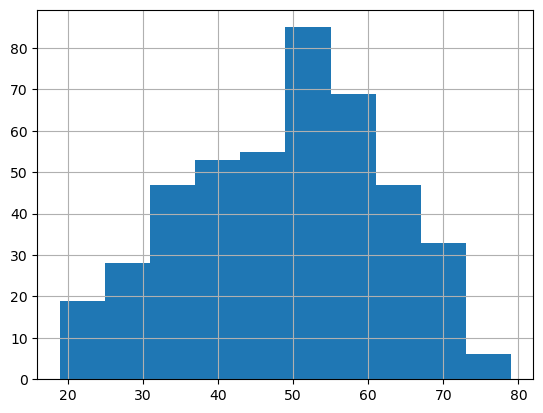

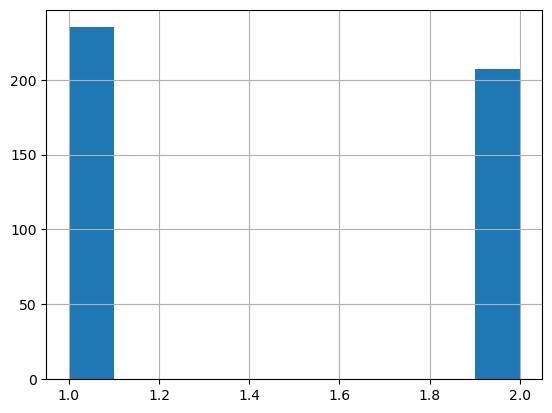

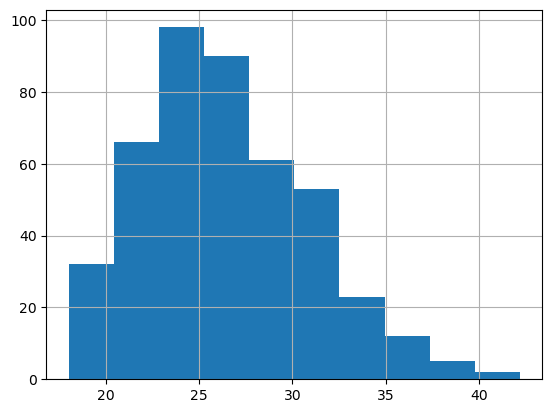

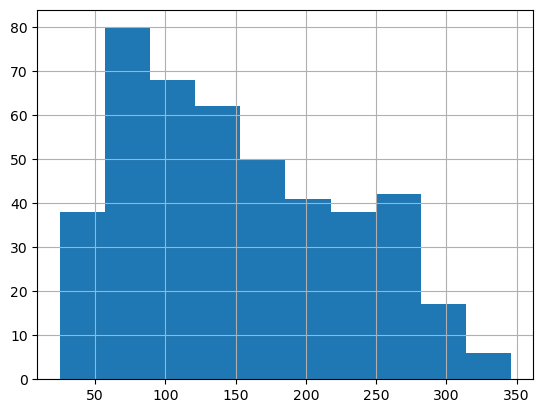

In [19]:
for col in ['AGE','SEX','BMI','Y']:
    df[col].hist()
    plt.show()

निष्कर्ष:  
* वय - सामान्य  
* लिंग - एकसमान  
* BMI, Y - सांगणे कठीण  


### कार्य ४: विविध चल आणि रोग प्रगती (Y) यांच्यातील परस्परसंबंध तपासा

> **सूचना** परस्परसंबंध मॅट्रिक्स तुम्हाला कोणते मूल्ये परस्पर अवलंबून आहेत याबद्दल सर्वात उपयुक्त माहिती देईल.


In [20]:
df.corr()

AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
Y    0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

           S4        S5        S6         Y  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
S1   0.542207  0.515503  0.325717  0.212022  
S2   0.659817  0.318357  0.290600  0.174054  
S3  -0.738493 -0.398577 -0.273697 -0.394789  
S4   1.000000  0.617859  0.417212  0.430453  
S5   0.617859  1.000000  0.464669  0.565883  
S6   0.417212  0.464669  1.000000  0.382483  
Y    0.430453  0.565883  0.382483  1.000000

निष्कर्ष:  
* Y चा सर्वात मजबूत संबंध BMI आणि S5 (रक्तातील साखर) यांच्याशी आहे. हे तर्कसंगत वाटते.  


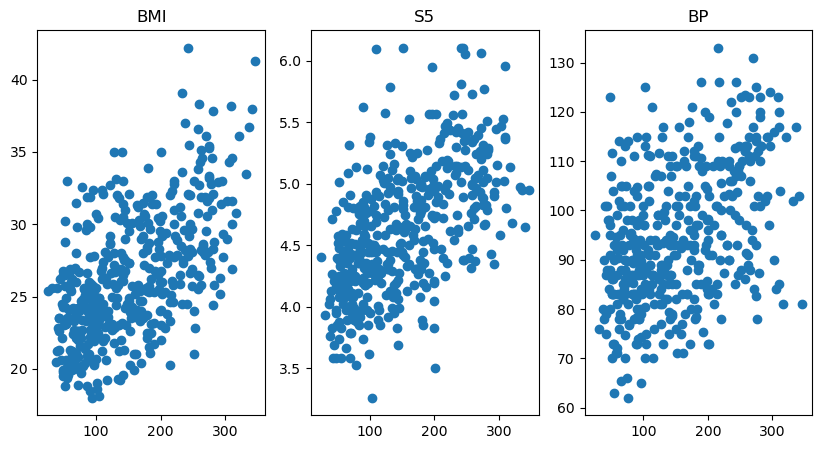

In [26]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i,n in enumerate(['BMI','S5','BP']):
    ax[i].scatter(df['Y'],df[n])
    ax[i].set_title(n)
plt.show()

In [27]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['SEX']==1,['Y']], df.loc[df['SEX']==2,['Y']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = -0.90
P-value: 0.3674449793083975



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) वापरून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी कृपया लक्षात ठेवा की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर करून निर्माण होणाऱ्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
